# Lab: Regression Analysis

In [2]:
from sklearn import linear_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [6]:
student_data = pd.DataFrame({
    "StudentID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [17, 51, 27, 21, 36, 48, 19, 26, 54, 30],
    "Tardies": [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]
})

student_data

,StudentID,Age,Tardies
0,1,17,10
1,2,51,1
2,3,27,5
3,4,21,9
4,5,36,4
5,6,48,2
6,7,19,9
7,8,26,6
8,9,54,0
9,10,30,3


Draw a dispersion diagram (scatter plot) for the data.

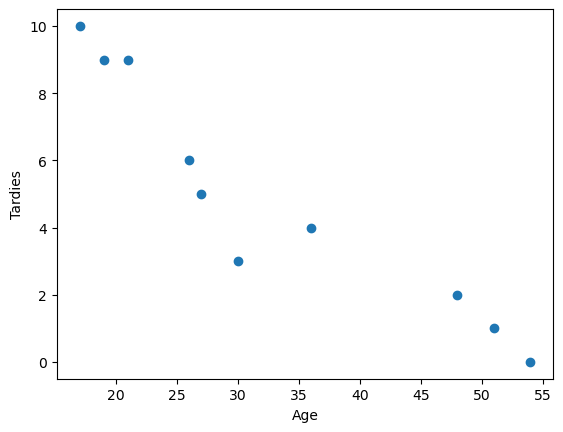

In [7]:
plt.scatter(student_data["Age"], student_data["Tardies"])
plt.xlabel("Age")
plt.ylabel("Tardies")

plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [ ]:
#The age and the number of tardies does not seem to be correlated. 

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [9]:
#correlation:
corr = student_data["Age"].corr(student_data["Tardies"])
print(f"Correlation: {corr}")

#covariance:
cov = student_data['Age'].cov(student_data['Tardies'])
print(f"Covariance: {cov}")

Correlation: -0.9391626886887122
Covariance: -45.56666666666666


In [ ]:
#Negative covariance means anti-correlation between the variables
#When two variables have a negative correlation, they exhibit an inverse relationship. 
#This means that when one variable experiences a change in one direction, the other variable responds with a change in the opposite direction.

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [11]:
x = student_data[["Age"]]
y = student_data["Tardies"]

model = linear_model.LinearRegression()
model.fit(x,y)
model.score(x,y)

0.8820265558250109

Plot your regression model on your scatter plot.

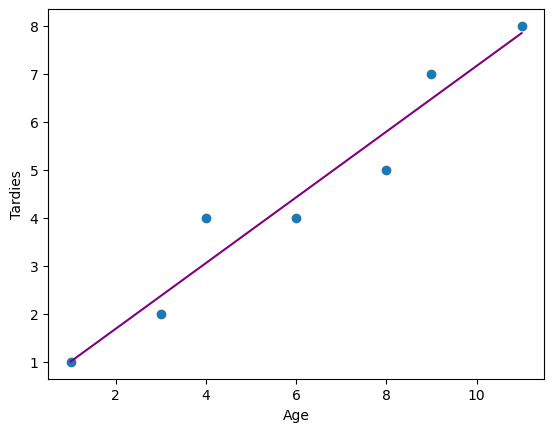

In [44]:
regression_line = model.intercept_ + model.coef_[0]*x
plt.plot(x, regression_line, c = "purple")
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.scatter(x, y)
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [ ]:
#If we look at the model, we can see that a 20 year old person can be 8 min late for class, and a 40 year old person 
# might be like 3 min late, so with this model we can say that the younger we are, the later we can be for class. 

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [18]:
vehicle = pd.read_csv("vehicles.csv")
vehicle.head(3)

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [20]:
variables = ["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year", "CO2 Emission Grams/Mile"]

corr = vehicle[variables].corr()
corr

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


In [ ]:
#The CO2 Emission Grams/Mile and the Fuel Barrels/Year plus the Fuel Cost/Year are the ones that are more correlated
#On the other way, the CO2 Emission Grams/Mile and the Year have a negative correlation.

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [21]:
#Multilinear Regression:

x = vehicle[["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year"]]
y = vehicle["CO2 Emission Grams/Mile"]

model = linear_model.LinearRegression()
model.fit(x,y)
model.score(x,y)

0.9808734920269122

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [23]:
regression_line = model.intercept_ + model.coef_[0]*x

regression_line

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year
0,133.784688,768.605817,763.671902,764.437799,144.685657
1,133.784688,767.964583,761.759170,765.720266,-47.684382
2,133.464072,768.605817,763.283379,764.758416,96.593147
3,133.464072,767.964583,761.759170,765.720266,-47.684382
4,132.822838,767.964583,763.283379,764.758416,-47.684382
...,...,...,...,...,...
35947,124.486803,768.926433,766.952770,758.346081,417.209879
35948,124.166186,768.926433,766.952770,758.346081,417.209879
35949,123.845570,768.926433,766.952770,758.346081,417.209879
35950,123.524953,768.926433,766.952770,758.346081,417.209879


In [ ]:
# The multilinear regression show us a value that is relatively high and indicates that the independent variables 
# in the multilinear regression model are accounting for a significant amount of the variability in the dependent variable. 
# Even though there are some variables with a negative correlation, in the other way are variables with an almost 
# perfect correlation.

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [25]:
party = pd.DataFrame({
    "invited": [1, 3, 4, 6, 8, 9, 11, 14],
    "attended": [1, 2, 4, 4, 5, 7, 8, 13]
})

party

,invited,attended
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

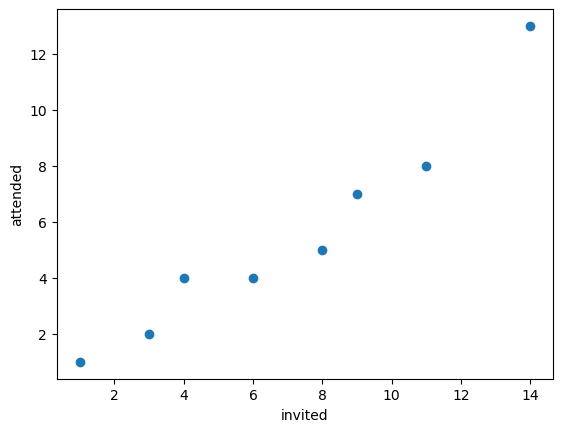

In [33]:
plt.scatter(party["invited"], party["attended"])
plt.xlabel("invited")
plt.ylabel("attended")

plt.show()

In [37]:
x = party[["invited"]]
y = party["attended"]

model = linear_model.LinearRegression()
model.fit(x,y)
model.score(x,y)

0.9316696375519905

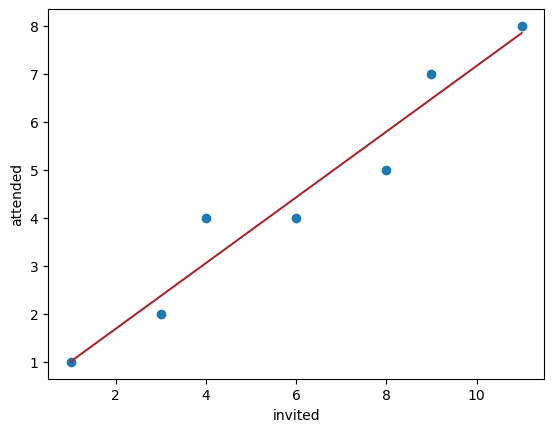

In [42]:
regression_line = model.intercept_ + model.coef_[0]*x
plt.plot(x, regression_line, c = "brown")
plt.xlabel('invited')
plt.ylabel('attended')
plt.scatter(x, y)
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [ ]:
#The correlation between the variables is pretty good. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [39]:
x = party[["invited"]][:-1]
y = party["attended"][:-1]

model = linear_model.LinearRegression()
model.fit(x,y)
model.score(x,y)

0.9433811802232854

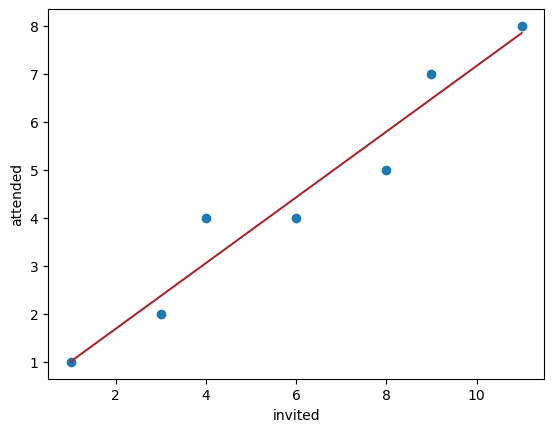

In [41]:
regression_line = model.intercept_ + model.coef_[0]*x
plt.plot(x, regression_line, c = "brown")
plt.xlabel('invited')
plt.ylabel('attended')
plt.scatter(x, y)
plt.show()

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
#When we remove the outlier, the correlation became higher, and the model looks better. 